<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:
print(boston_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB
None
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0

In [5]:
print(boston_df.head())


   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


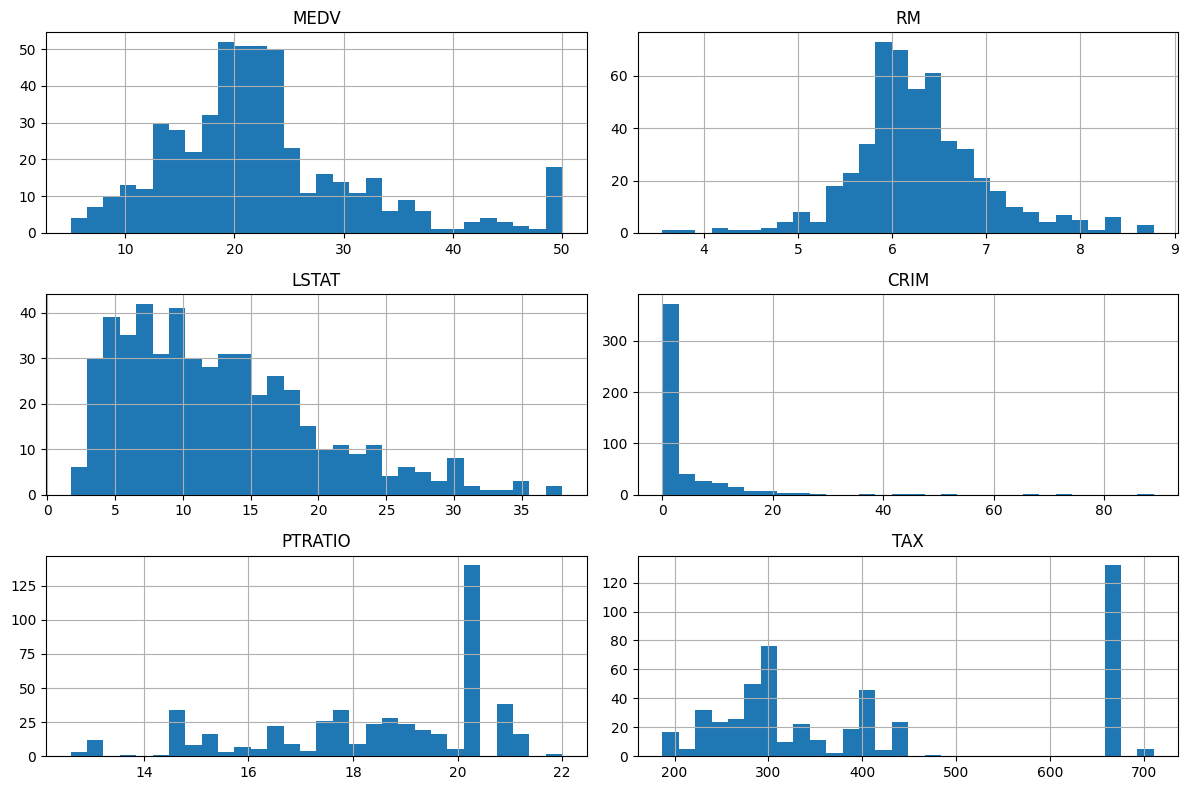

In [7]:
numeric_cols = ['MEDV', 'RM', 'LSTAT', 'CRIM', 'PTRATIO', 'TAX']

boston_df[numeric_cols].hist(bins=30, figsize=(12, 8))
pyplot.tight_layout()
pyplot.show()

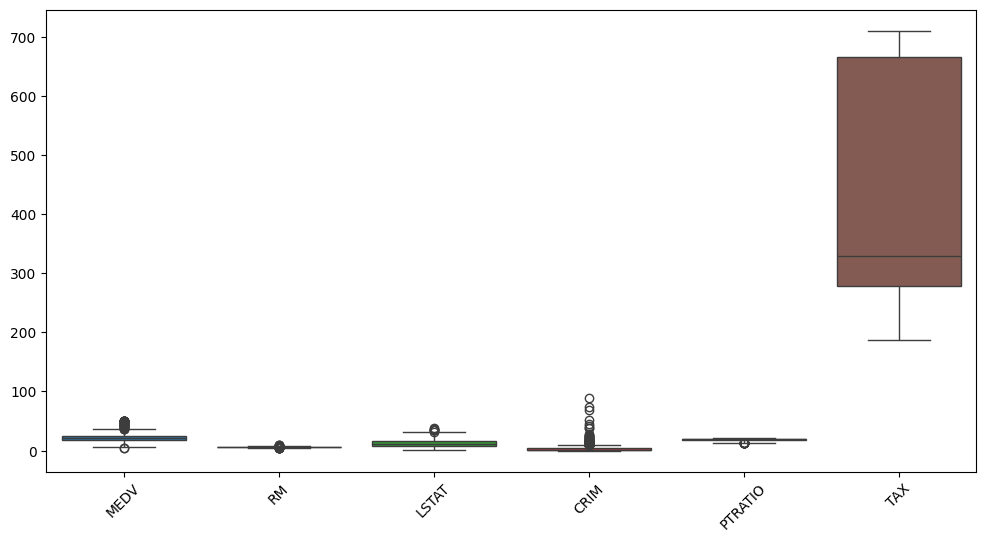

In [9]:
pyplot.figure(figsize=(12, 6))
sns.boxplot(data=boston_df[numeric_cols])
pyplot.xticks(rotation=45)
pyplot.show()


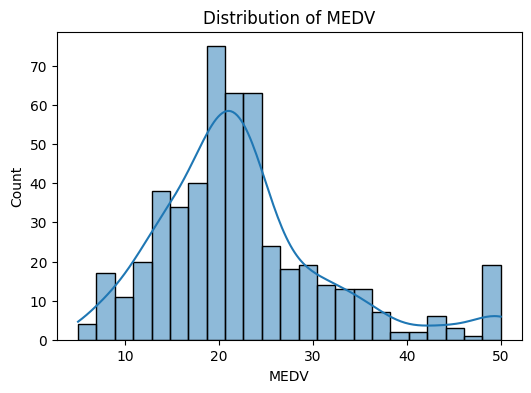

In [10]:
pyplot.figure(figsize=(6, 4))
sns.histplot(boston_df['MEDV'], kde=True)
pyplot.title('Distribution of MEDV')
pyplot.show()

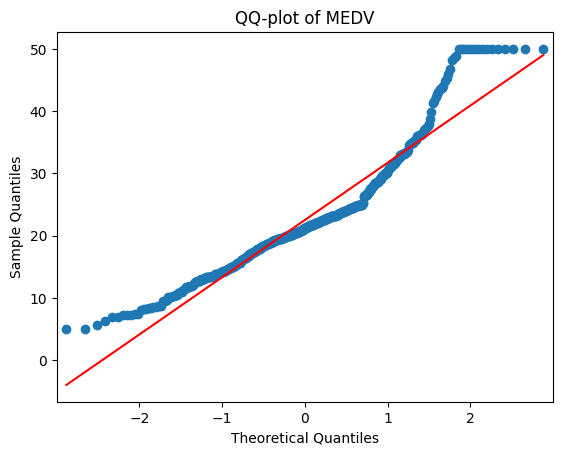

In [11]:
sm.qqplot(boston_df['MEDV'], line='s')
pyplot.title('QQ-plot of MEDV')
pyplot.show()

(471,) (35,)


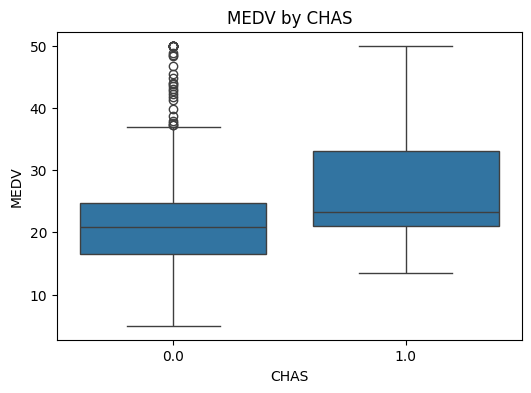

T-statistic = -3.1133, p-value = 0.0036


In [16]:
# Split MEDV by CHAS
medv_chas0 = boston_df.loc[boston_df['CHAS'] == 0, 'MEDV']
medv_chas1 = boston_df.loc[boston_df['CHAS'] == 1, 'MEDV']

# Check group sizes
print(medv_chas0.shape, medv_chas1.shape)

# Boxplot for visual comparison
pyplot.figure(figsize=(6, 4))
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
pyplot.title('MEDV by CHAS')
pyplot.show()

# Independent two-sample t-test (Welch's t-test by default with equal_var=False)
t_stat, p_val = scipy.stats.ttest_ind(medv_chas0, medv_chas1, equal_var=False)
print(f"T-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")


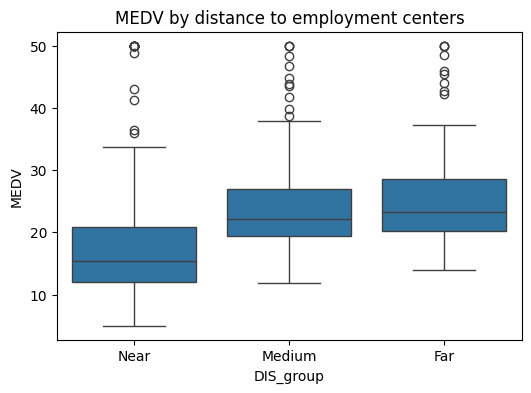

                    sum_sq     df          F        PR(>F)
C(DIS_group)   4487.437326    2.0  29.521951  7.535858e-13
Residual      38228.858089  503.0        NaN           NaN


In [ ]:

boston_df['DIS_group'] = pd.qcut(boston_df['DIS'], q=3, labels=['Near', 'Medium', 'Far'])

pyplot.figure(figsize=(6, 4))
sns.boxplot(x='DIS_group', y='MEDV', data=boston_df)
pyplot.title('MEDV by distance to employment centers')
pyplot.show()

model_anova = ols('MEDV ~ C(DIS_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)
print(anova_table)


Correlation (CRIM, MEDV) = -0.3883, p-value = 0.0000


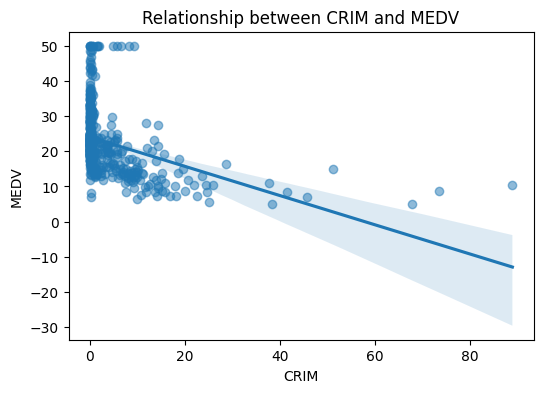

In [20]:
corr_coeff, p_val = scipy.stats.pearsonr(boston_df['CRIM'], boston_df['MEDV'])
print(f"Correlation (CRIM, MEDV) = {corr_coeff:.4f}, p-value = {p_val:.4f}")

# Scatterplot with regression line
pyplot.figure(figsize=(6, 4))
sns.regplot(x='CRIM', y='MEDV', data=boston_df, scatter_kws={'alpha':0.5})
pyplot.title('Relationship between CRIM and MEDV')
pyplot.show()

In [21]:
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_val = scipy.stats.ttest_ind(medv_chas0, medv_chas1, equal_var=False)
print(f"T-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

T-statistic = -3.1133, p-value = 0.0036


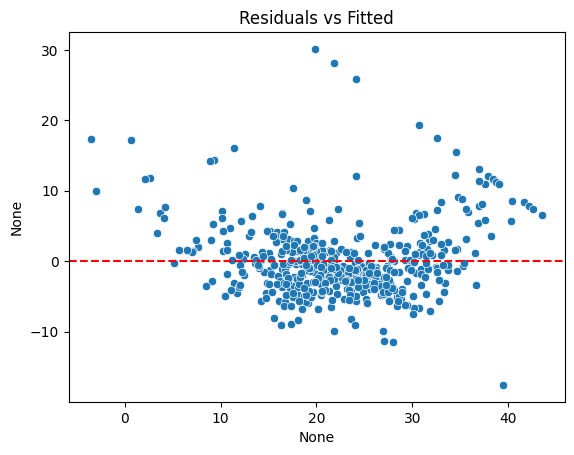

In [ ]:
fitted = model.fittedvalues
residuals = model.resid

# Residuals vs Fitted
sns.scatterplot(x=fitted, y=residuals)
pyplot.axhline(0, color='red', linestyle='--')
pyplot.title('Residuals vs Fitted')
pyplot.show()